In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [4]:
df = pd.read_csv('/content/sample_data/customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [6]:
print(df.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [7]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [8]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1500, 9)


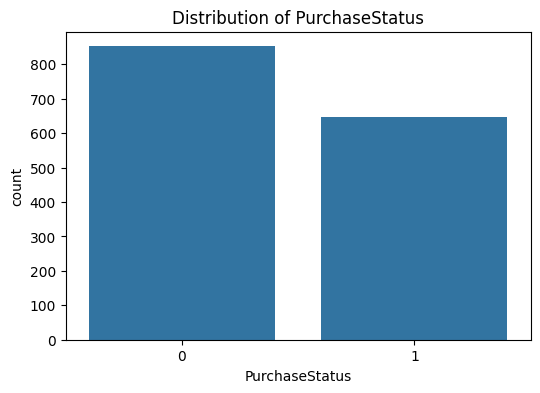

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of PurchaseStatus')
plt.show()

In [10]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [11]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# print(X_scaled)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (1200, 8)
x_test:  (300, 8)
y_train:  (1200,)
y_test:  (300,)


In [13]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)

# # Các hyperparameters ban đầu
# print("Hyperparameters:")
# print(rf_model.get_params())

In [14]:
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

#dump
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [15]:
print(f"Số cây trong rừng (n_estimators): {len(rf_model.estimators_)}")
print(f"Criterion: {rf_model.criterion}")
print(f"Số lượng đặc trưng sử dụng mỗi cây (max_features): {rf_model.max_features}")
print(f"Bootstrap: {rf_model.bootstrap}")

Số cây trong rừng (n_estimators): 100
Criterion: gini
Số lượng đặc trưng sử dụng mỗi cây (max_features): sqrt
Bootstrap: True


Random Forest:
 Accuracy: 0.9533333333333334
 Precision: 0.9913793103448276
 Recall: 0.8984375
 F1 Score: 0.9426229508196722


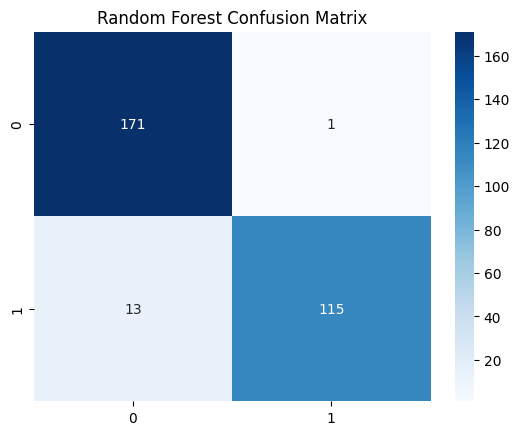

In [16]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [17]:
# from sklearn.tree import export_text
# # Các thông số sau khi huấn luyện
# print("\nThông tin sau khi huấn luyện:")
# print("Số cây trong rừng:", len(rf_model.estimators_))
# print("Danh sách nhãn phân loại (classes_):", rf_model.classes_)
# print("Feature importances:", rf_model.feature_importances_)

# # oob_score=True khi huấn luyện
# if hasattr(rf_model, "oob_score_"):
#     print("Out-of-Bag Score:", rf_model.oob_score_)

# # Xem chi tiết một cây (ví dụ cây đầu tiên)
# print("\nChi tiết cây đầu tiên:")
# print(export_text(rf_model.estimators_[0]))

In [18]:
# Lấy importance
importances = rf_model.feature_importances_

# Hiển thị với DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

              Feature  Importance
5  TimeSpentOnWebsite    0.204276
0                 Age    0.182501
2        AnnualIncome    0.157908
7    DiscountsAvailed    0.156777
3   NumberOfPurchases    0.143986
6      LoyaltyProgram    0.099536
4     ProductCategory    0.038654
1              Gender    0.016362


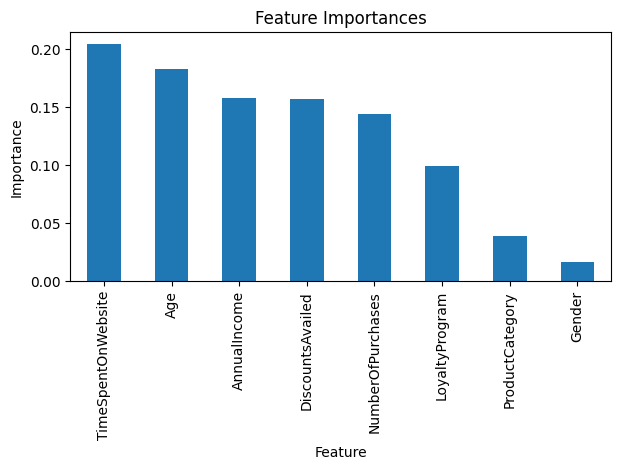

In [19]:
# Vẽ biểu đồ
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

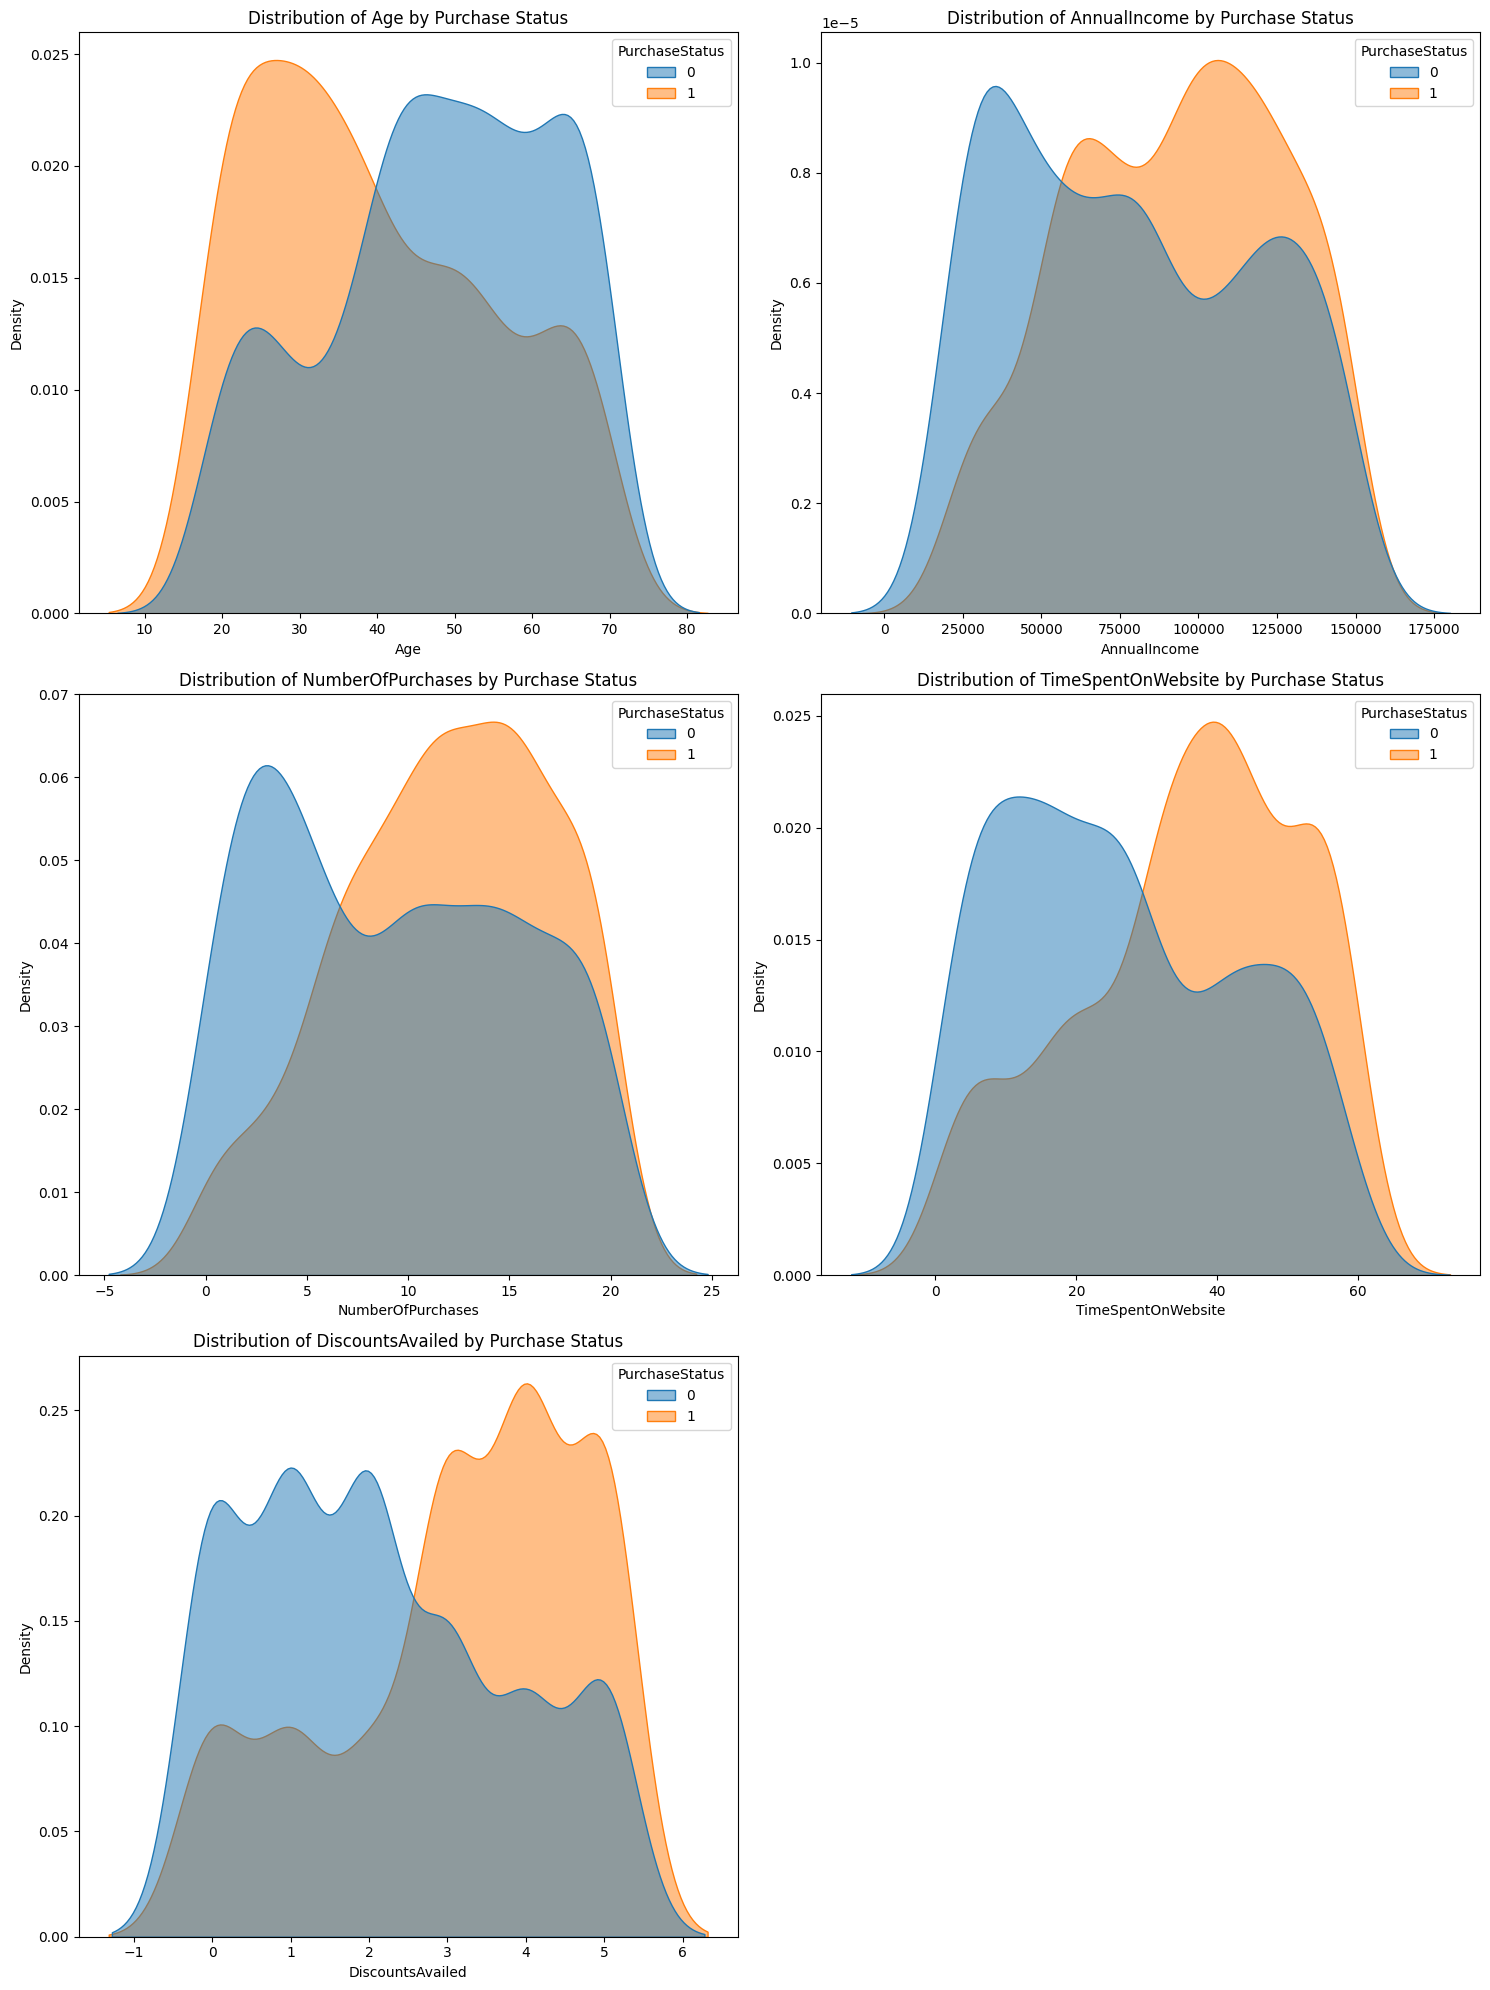

In [20]:
features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=feature, hue='PurchaseStatus', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature} by Purchase Status')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()